In [ ]:
#%%
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np


file = 'data_working.csv'

#This function get those veraibels and output the desired data.

def clean_data(file,first_day,last_day):
    file = 'data_working.csv'
    df=pd.read_csv(file)

    #Make the Category column easier to understand

    df=df.replace({'Category' : { 'Y' : "Antisemitic", 'W' : "Non-Antisemitic", 'U' : "Anti-Zionist" }})

    #get rid of NaNs in category

    list = ["Anti-Zionist", "Antisemitic", "Non-Antisemitic"]

    df = df.loc[df['Category'].isin(list)]

    #Convert "time stamp" to english


    df = df.rename(columns={"חותמת זמן":"Time stamp"})

    df = df.rename(columns={"In this search, what keywords or hashtags did you use? Please be specific. Also, Please include hashtags and keywords from the original post. Only English keywords!":"Keywords"})

    #Change the date time to the d/m/y
    from datetime import datetime
    df['Time stamp'] = pd.to_datetime(df['Time stamp']).dt.date #This function convert the date text into dt.date type

    date = df['Time stamp'].astype('datetime64[ns]')
    dates = (first_day <= date) & (date <= last_day)
    new_df = df[dates]

    return new_df

new_df = clean_data(file,'2021-09-01', '2022-08-25')
print(new_df.head())


            Category      Removed Removed 1  Time stamp First name  \
184  Non-Antisemitic      Removed       NaN  2021-09-01      Daria   
185  Non-Antisemitic      Removed       NaN  2021-09-01      Daria   
187      Antisemitic  Not Removed         X  2021-09-01      Daria   
188      Antisemitic  Not Removed         X  2021-09-01      Daria   
189      Antisemitic  Not Removed         X  2021-09-01    shachar   

    Last (family) name   Platform     Lang  \
184           Kazakova  Instagram  English   
185           Kazakova  Instagram  English   
187           Kazakova    Twitter  English   
188           Kazakova    Twitter  English   
189            shapira    Twitter  English   

                                         Content Link   \
184           https://www.instagram.com/p/CJjTlbNFC35/   
185           https://www.instagram.com/p/CJfsriKgr0a/   
187  https://twitter.com/Mari10095/status/126806376...   
188  https://twitter.com/FarhanA21423375/status/126...   
189  \nhttps

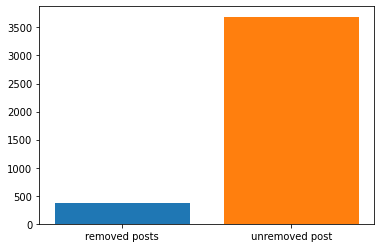

removed posts: 376
unremoved post: 3691


In [ ]:
import seaborn as sns

not_removed = len(new_df.loc[(new_df['Removed'] == 'Not Removed')])
removed = len(new_df.loc[(new_df['Removed'] == 'Removed')])

#draw bar plot
names = ["removed posts","unremoved post"]
values = [removed,not_removed]
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])
plt.xticks(range(0,2),names)
plt.show()
print(f"removed posts: {removed}")
print(f"unremoved post: {not_removed}")


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

keywords = new_df["Keywords"].tolist()

keywords_list =[]

for i in keywords:
  if type(i)==str:
      word = i.lower()
      if '#' in word:
        word_list = word.split('#')
        for j in word_list:
          word = j.strip()
          if word!=''  and '-' not in word :
            keywords_list.append(word)
 
       

for j in keywords_list:
  if '*' or 'none' or '-' in j:
    keywords_list.remove(j)

keywords_df = pd.DataFrame (keywords_list, columns = ['keywords'])
df = keywords_df.value_counts().rename_axis('keywords').reset_index(name='counts')

df.index = range(1,len(df)+1)
df.head(5)



,keywords,counts
1,deathtoisrael,14
2,killjews,13
3,freepalestine,11
4,israelterrorist,9
5,zionazis,9


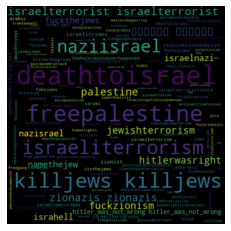

In [ ]:
# Display word cloud:

t = keywords_list[0]

for word in keywords_list:
  t +=" "
  t +=word
text =(t)

wordcloud = WordCloud(width=480, height=480).generate(text)
 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


DATA BY PLATFORM


In [ ]:
by_platform = new_df.value_counts('Platform') #reported posts by platform
by_platform

Platform
Twitter      2409
VK            814
Instagram     495
Facebook      412
Gab           173
TikTok         70
YouTube        51
Other          38
Telegram        4
Tumblr          2
OK              1
TIkTok          1
dtype: int64

In [ ]:
remove= (new_df['Removed'] == 'Removed').sum()
print('Total cases removed:', remove)

Total cases removed: 376


Platform   Removed    
Twitter    Not Removed    2128
VK         Not Removed     574
Instagram  Not Removed     434
Facebook   Not Removed     272
Gab        Not Removed     148
Twitter    Removed         132
VK         Removed         127
TikTok     Not Removed      58
Facebook   Removed          58
Instagram  Removed          37
Other      Not Removed      36
YouTube    Not Removed      33
TikTok     Removed          12
Twitter    REMOVED           9
VK         REMOVED           7
YouTube    Removed           6
Telegram   Not Removed       4
Tumblr     Not Removed       2
Facebook   REMOVED           2
Gab        Removed           2
           REMOVED           2
VK         Not removed       2
Other      Removed           2
Twitter     Removed          1
OK         Not Removed       1
VK          Removed          1
TIkTok     Not Removed       1
Instagram  REMOVED           1
dtype: int64

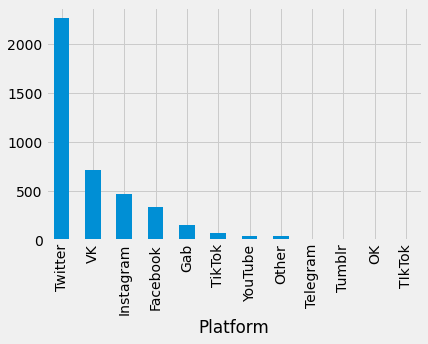

In [ ]:
func_df = new_df[['Platform','Removed']]
plt.style.use('fivethirtyeight')
func_df.value_counts('Platform').plot(kind = 'bar')
func_df.value_counts()


In [ ]:
print("Removed values:")
func_df[func_df['Removed'] == 'Removed'].value_counts('Platform') 

Removed values:


Platform
Twitter      132
VK           127
Facebook      58
Instagram     37
TikTok        12
YouTube        6
Gab            2
Other          2
dtype: int64